In [5]:
import re
import pandas as pd

df = pd.read_csv('../data.csv')
# program_name = df['ProgramName'].str.extract(r'[-—]([^-—]*)$', flags=re.MULTILINE)
# window_name = df['ProgramName'].str.extract(r'^(.*)[-—]', flags=re.MULTILINE)
df['ProcessName'] = df['ProcessName'].str.capitalize()

df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])
df['DeltaTime'] = df['EndTime'] - df['StartTime']
df['DeltaSeconds'] = df['DeltaTime'].dt.total_seconds()
df['DeltaMinutes'] = df['DeltaSeconds'] / 60
df

,WindowTitle,ProcessName,StartTime,EndTime,DeltaTime,DeltaSeconds,DeltaMinutes
0,main.py - wintrak - Visual Studio Code,Code,2023-07-23 10:10:24.170501,2023-07-23 10:10:35.493409,0 days 00:00:11.322908,11.322908,0.188715
1,timer.py - wintrak - Visual Studio Code,Code,2023-07-23 10:10:35.494121,2023-07-23 10:10:43.676320,0 days 00:00:08.182199,8.182199,0.136370
2,main.py - wintrak - Visual Studio Code,Code,2023-07-23 10:10:43.676799,2023-07-23 10:10:45.023199,0 days 00:00:01.346400,1.346400,0.022440
3,listener.py - wintrak - Visual Studio Code,Code,2023-07-23 10:10:45.023773,2023-07-23 10:10:48.112856,0 days 00:00:03.089083,3.089083,0.051485
4,● listener.py - wintrak - Visual Studio Code,Code,2023-07-23 10:10:48.113531,2023-07-23 10:10:48.497234,0 days 00:00:00.383703,0.383703,0.006395
...,...,...,...,...,...,...,...
1070,app.js - wintrak - Visual Studio Code,Code,2023-07-24 18:39:49.134069,2023-07-24 18:39:51.956950,0 days 00:00:02.822881,2.822881,0.047048
1071,wintrak : pipenv — Yakuake,Yakuake,2023-07-24 18:39:51.963205,2023-07-24 18:39:52.813054,0 days 00:00:00.849849,0.849849,0.014164
1072,app.js - wintrak - Visual Studio Code,Code,2023-07-24 18:39:52.814185,2023-07-24 18:39:54.597437,0 days 00:00:01.783252,1.783252,0.029721
1073,data.csv - wintrak - Visual Studio Code,Code,2023-07-24 18:39:54.598048,2023-07-24 18:40:01.970457,0 days 00:00:07.372409,7.372409,0.122873


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

<Axes: ylabel='DeltaTime'>

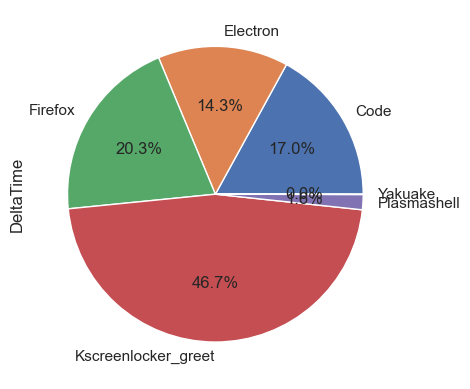

In [7]:
# Pie plot of time spent on each program
df.groupby('ProcessName').DeltaTime.sum().dt.seconds.plot.pie(y='DeltaTime', autopct='%1.1f%%')

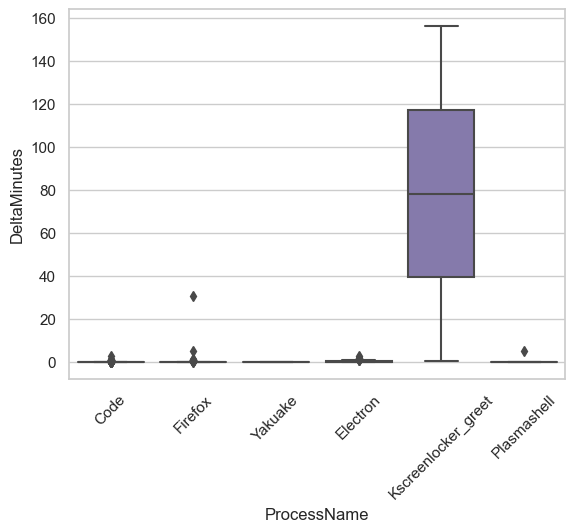

In [8]:
sns.boxplot(x="ProcessName", y="DeltaMinutes", data=df)
plt.xticks(rotation=45) 
 
None